# 02. PyTorch Neural Network Classification

### What is a classification problem?

In machine learning, **classification** means predicting **what category something belongs to**.

For example:

| Problem type                   | What is it?                                              | Example                                                                                  |
| ------------------------------ | -------------------------------------------------------- | ---------------------------------------------------------------------------------------- |
| **Binary classification**      | The target can only be one of **two options**            | Predict whether someone has **heart disease (yes/no)**                                   |
| **Multi-class classification** | The target can be **more than two options**              | Decide whether an image is of a **dog, cat, or bird**                                    |
| **Multi-label classification** | The target can belong to **multiple categories at once** | Tagging a Wikipedia article as **science, philosophy, and mathematics** at the same time |

📌 Together with **regression** (predicting numbers), **classification** is one of the most common tasks in machine learning.

---

### What are we going to do?

In this notebook, we’ll build classification models using **PyTorch**.

Instead of predicting a straight line (like we did in regression), we’ll now learn how to **predict categories (classes)**.

Here’s the roadmap:

1. **Architecture of a classification neural network**

   * Learn how neural networks for classification are structured.

2. **Getting binary classification data ready**

   * Create a simple dataset for yes/no predictions.

3. **Building a PyTorch classification model**

   * Define a model, choose a loss function, pick an optimizer, and prepare a training loop.

4. **Fitting the model to data (training)**

   * Train the model so it can start learning from the dataset.

5. **Making predictions and evaluating the model (inference)**

   * Test the model and compare predictions against real labels.

6. **Improving the model**

   * If it doesn’t work well, we’ll explore tricks to make it better.

7. **Non-linearity**

   * Understand why neural networks need non-linear functions to handle complex patterns.

8. **Replicating non-linear functions**

   * Visualize and explore how non-linear functions behave.

9. **Putting it all together with multi-class classification**

   * Finally, extend everything we’ve learned to a multi-class classification problem.

---

💡 **By the end of this section**, you’ll know how to take a dataset, build a classification neural network in PyTorch, train it, test it, and even improve it.

![Pytorch workflow](./images/01_a_pytorch_workflow.png)

# 🧠 Architecture of a Classification Neural Network

Before writing code, let’s first understand the **general architecture** of a neural network used for classification tasks.

A classification neural network is composed of **layers of neurons** that transform raw input features into meaningful predictions. The specific configuration depends on whether the task is **binary classification** (two classes) or **multiclass classification** (more than two classes).

---

## 🔹 Key Components

| **Hyperparameter**                     | **Binary Classification**                                                                                     | **Multiclass Classification**                                                                 | **Explanation**                                                                                                                                                                                 |
| -------------------------------------- | ------------------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Input layer shape (in\_features)**   | Same as number of features (e.g., 5 for age, sex, height, weight, smoking status in heart disease prediction) | Same as binary classification                                                                 | The input layer size must match the number of input features. Each feature corresponds to one neuron in the input layer.                                                                        |
| **Hidden layer(s)**                    | Problem-specific, minimum = 1, maximum = unlimited                                                            | Same as binary classification                                                                 | Hidden layers extract patterns from the input. The more complex the problem, the more hidden layers you may need. However, too many can lead to **overfitting**.                                |
| **Neurons per hidden layer**           | Problem-specific, generally 10 to 512                                                                         | Same as binary classification                                                                 | Each hidden layer can have a variable number of neurons. Too few neurons may underfit (not learn enough patterns), while too many can overfit.                                                  |
| **Output layer shape (out\_features)** | 1 (representing one of two classes)                                                                           | 1 per class (e.g., 3 neurons for predicting whether an image is a *food*, *person*, or *dog*) | The output layer determines the number of possible classes. For binary problems, a single output neuron suffices. For multiclass problems, each class gets its own neuron.                      |
| **Hidden layer activation**            | Usually **ReLU** (Rectified Linear Unit), but can also be Tanh, LeakyReLU, etc.                               | Same as binary classification                                                                 | The activation function introduces non-linearity, enabling the network to learn complex relationships. ReLU is the most common because it helps avoid vanishing gradients.                      |
| **Output activation**                  | **Sigmoid** (`torch.sigmoid`)                                                                                 | **Softmax** (`torch.softmax`)                                                                 | In binary classification, sigmoid squashes the output to a probability between 0 and 1. In multiclass, softmax converts raw scores into probabilities across multiple classes.                  |
| **Loss function**                      | **Binary Cross-Entropy** (`torch.nn.BCELoss` or `torch.nn.BCEWithLogitsLoss`)                                 | **Cross-Entropy** (`torch.nn.CrossEntropyLoss`)                                               | The loss function measures how wrong the model’s predictions are. Binary cross-entropy is suited for two-class problems, while cross-entropy works for multiple classes.                        |
| **Optimizer**                          | **SGD**, **Adam**, etc.                                                                                       | Same as binary classification                                                                 | Optimizers update the model’s weights during training. SGD is simple and effective for small problems, while Adam adapts learning rates dynamically and often performs better on complex tasks. |

---

## 🔹 Diagram of a Classification Neural Network

Here’s a simple sketch of how a classification network looks:

```text
         Input Layer (Features)
        ┌─────────┬─────────┬─────────┐
        │   x1    │   x2    │   x3    │ ... (e.g., age, weight, height)
        └─────────┴─────────┴─────────┘
                  │
                  ▼
        ┌─────────────────────────────┐
        │       Hidden Layer 1        │  → ReLU activation
        └─────────────────────────────┘
                  │
                  ▼
        ┌─────────────────────────────┐
        │       Hidden Layer 2        │  → ReLU activation
        └─────────────────────────────┘
                  │
                  ▼
        ┌─────────────────────────────┐
        │        Output Layer         │  
        └─────────────────────────────┘
            │              │
            ▼              ▼
        Binary → Sigmoid   Multiclass → Softmax
```

* **Input Layer**: Each neuron corresponds to one feature.
* **Hidden Layers**: Transform features into abstract representations.
* **Output Layer**: Produces final probabilities.
* **Activation Functions**: ReLU inside hidden layers, Sigmoid or Softmax in output layer depending on classification type.

---

✅ With this setup, you now have both the **ingredients (table)** and a **blueprint (diagram)** to design classification neural networks.

In [1]:
from sklearn.datasets import make_circles

n_samples = 1000 

X, y = make_circles(n_samples, noise=0.03, random_state=42)


print(f"First five features: \n {X[:5]}")
print(f"\nFirst five labels: \n {y[:5]}")

First five features: 
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First five labels: 
 [1 1 1 1 0]


In [2]:
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [3]:
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

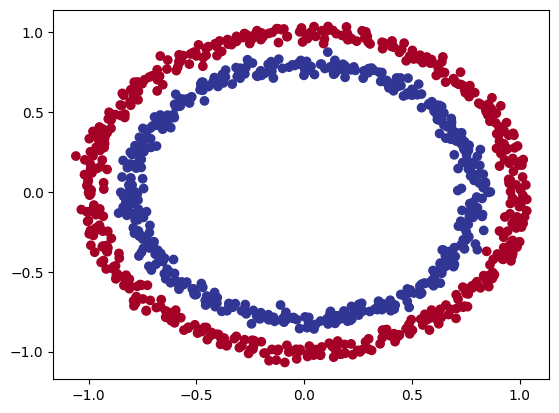

In [4]:
import matplotlib.pyplot as plt 

plt.scatter(x=X[:, 0], 
            y=X[:, 1], 
            c=y, 
            cmap=plt.cm.RdYlBu);

In [5]:
X.shape, y.shape

((1000, 2), (1000,))

In [6]:
# Turn data into tensors

import torch 

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# X[:5], y[:5]

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [13]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [18]:
from torch import nn

device = "mps" if torch.backends.mps.is_available() else "cpu"

print(f"Current device: {device}")

Current device: mps


In [19]:
class CirclesModelV0(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer_1 = nn.Linear(in_features=2, out_features=5)
        self.layer_2 = nn.Linear(in_features=5, out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.layer_2(self.layer_1(x))      

In [20]:
model_0 = CirclesModelV0().to(device)

model_0

CirclesModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [22]:
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [23]:
# making predictions 

untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[ 0.4945],
        [ 0.3086],
        [ 0.6964],
        [ 0.4385],
        [ 0.2435],
        [ 0.1335],
        [-0.0309],
        [-0.0730],
        [ 0.7152],
        [ 0.2912]], device='mps:0', grad_fn=<SliceBackward0>)

First 10 test labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


## 2.1 Setup Loss Function and Optimizer

When training neural networks in PyTorch, we need two important components:

1. **Loss function** (also called *criterion* or *cost function*):

   * Tells the model **how wrong its predictions are** compared to the true labels.
   * Different tasks (regression, classification, etc.) require different loss functions.

2. **Optimizer**:

   * Updates the model parameters (weights & biases) based on the gradients.
   * Many optimizers (like SGD and Adam) can be used across multiple problem types.

For example:

* In a **regression problem** (predicting a number), you might use **Mean Absolute Error (MAE)** or **Mean Squared Error (MSE)**.
* In a **binary classification problem** (yes/no, 0/1), you’ll often use **Binary Cross Entropy (BCE)**.
* In a **multi-class classification problem** (more than two classes), you’ll use **Cross Entropy Loss**.

---

### 📑 Common Loss Functions and Optimizers

| **Loss Function / Optimizer**                   | **Problem Type**                        | **PyTorch Code**                                                                             |
| ----------------------------------------------- | --------------------------------------- | -------------------------------------------------------------------------------------------- |
| **Stochastic Gradient Descent (SGD) Optimizer** | Classification, Regression, many others | `torch.optim.SGD()`                                                                          |
| **Adam Optimizer**                              | Classification, Regression, many others | `torch.optim.Adam()`                                                                         |
| **Binary Cross Entropy (BCE) Loss**             | Binary Classification (0/1)             | `torch.nn.BCELoss()` or `torch.nn.BCEWithLogitsLoss()` *(preferred for numerical stability)* |
| **Cross Entropy Loss**                          | Multi-class Classification              | `torch.nn.CrossEntropyLoss()`                                                                |
| **Mean Absolute Error (MAE) / L1 Loss**         | Regression                              | `torch.nn.L1Loss()`                                                                          |
| **Mean Squared Error (MSE) / L2 Loss**          | Regression                              | `torch.nn.MSELoss()`                                                                         |

---

✅ **Quick Note on BCEWithLogitsLoss**

* Instead of applying a `Sigmoid` activation + `BCELoss` separately, PyTorch provides `BCEWithLogitsLoss`, which combines both in one step.
* This is **numerically more stable** and is the recommended way for binary classification.

---

⚡ In practice, you’ll often start with **Adam optimizer** (because it adapts learning rates automatically) and then adjust later if needed.

In [24]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [25]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

### 🔄 PyTorch Training Loop Steps

1. **Forward pass**  
   - The model goes through all of the training data once, performing its `forward()` function calculations.  
   - Example:  
     ```python
     y_pred = model(x_train)
     ```

2. **Calculate the loss**  
   - The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are.  
   - Example:  
     ```python
     loss = loss_fn(y_pred, y_train)
     ```

3. **Zero gradients**  
   - The optimizer’s gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step.  
   - Example:  
     ```python
     optimizer.zero_grad()
     ```

4. **Perform backpropagation on the loss**  
   - Computes the gradient of the loss with respect to every model parameter to be updated (each parameter with `requires_grad=True`).  
   - This is known as backpropagation, hence “backwards.”  
   - Example:  
     ```python
     loss.backward()
     ```

5. **Step the optimizer (gradient descent)**  
   - Update the parameters with `requires_grad=True` with respect to the loss gradients in order to improve them.  
   - Example:  
     ```python
     optimizer.step()
     ```

In [27]:
y_logits = model_0(X_test.to(device))[:5]

y_logits

tensor([[0.4945],
        [0.3086],
        [0.6964],
        [0.4385],
        [0.2435]], device='mps:0', grad_fn=<SliceBackward0>)

In [29]:
torch.round(torch.sigmoid(y_logits))

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]], device='mps:0', grad_fn=<RoundBackward0>)

In [32]:
# creating a loop for the models

epochs = 100

# Put data to target device(GPU)
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Building training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_0.train()

    y_logits = model_0(X_train).squeeze()
    y_preds = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits, y_train)

    acc = accuracy_fn(y_true=y_train, y_pred=y_preds)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_0.eval()

    with torch.inference_mode():
        test_logits = model_0(X_test).squeeze()

        test_preds = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits, y_test)

        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_preds)

     # Print out what's happening every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.71904, Accuracy: 58.38% | Test loss: 0.70908, Test acc: 59.00%
Epoch: 10 | Loss: 0.70580, Accuracy: 52.75% | Test loss: 0.69752, Test acc: 51.50%
Epoch: 20 | Loss: 0.70081, Accuracy: 51.75% | Test loss: 0.69361, Test acc: 51.00%
Epoch: 30 | Loss: 0.69844, Accuracy: 51.25% | Test loss: 0.69212, Test acc: 50.50%
Epoch: 40 | Loss: 0.69706, Accuracy: 50.38% | Test loss: 0.69150, Test acc: 51.00%
Epoch: 50 | Loss: 0.69612, Accuracy: 49.75% | Test loss: 0.69126, Test acc: 52.00%
Epoch: 60 | Loss: 0.69544, Accuracy: 50.00% | Test loss: 0.69120, Test acc: 52.00%
Epoch: 70 | Loss: 0.69493, Accuracy: 50.25% | Test loss: 0.69126, Test acc: 52.00%
Epoch: 80 | Loss: 0.69453, Accuracy: 50.12% | Test loss: 0.69138, Test acc: 53.00%
Epoch: 90 | Loss: 0.69422, Accuracy: 50.00% | Test loss: 0.69154, Test acc: 53.00%


In [33]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file(): 
    print("helper_functions.py exists skipping the download 📥")
else:
    print("Downloading helper_functions.py")

    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")

    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

In [34]:
from helper_functions import plot_predictions, plot_decision_boundary

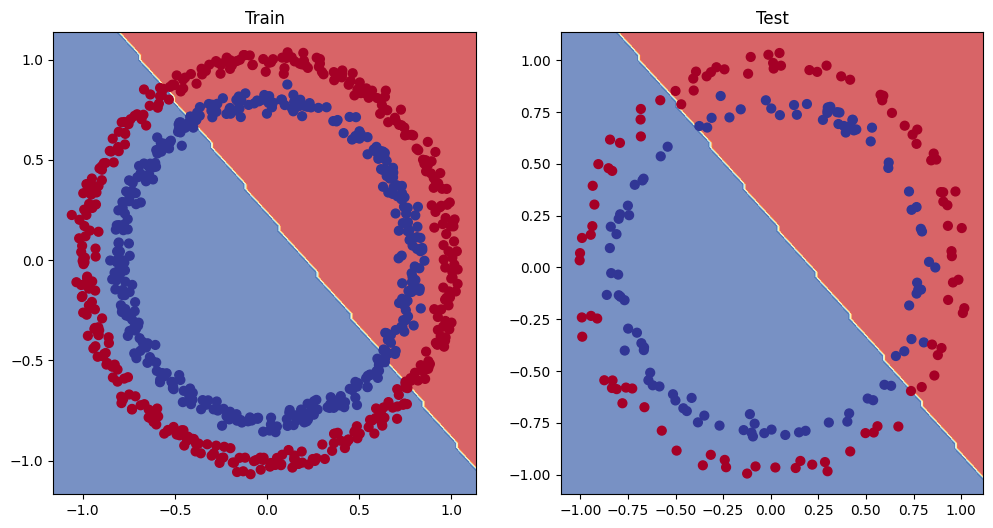

In [38]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 5. Improving a Model (from a Model Perspective)

Our current model is underfitting, meaning it hasn’t learned the underlying patterns in the data well enough.  
From a **model perspective** (not focusing on the data), here are several techniques to try:

| Model Improvement Technique | What does it do? |
|-----------------------------|------------------|
| **Add more layers** | Each layer potentially increases the learning capabilities of the model, with each layer learning new patterns in the data. More layers = a *deeper* neural network. |
| **Add more hidden units** | Increasing the number of hidden units per layer gives the model more capacity to learn. More hidden units = a *wider* neural network. |
| **Fit for longer (more epochs)** | Allowing the model to see the data more times can help it learn more complex relationships. |
| **Change the activation functions** | Some data cannot be fit with only straight lines. Using non-linear activation functions (e.g., ReLU, tanh, sigmoid) helps the model capture non-linear patterns. |
| **Change the learning rate** | The learning rate controls how much the model updates its parameters after each step. - Too high → model overcorrects. - Too low → model learns very slowly. |
| **Change the loss function** | Different problems require different loss functions. For example: - Binary classification → Binary Cross Entropy. - Multi-class classification → Cross Entropy Loss. |
| **Use transfer learning** | Start from a pretrained model trained on a similar problem and fine-tune it for your specific dataset. (Covered in Notebook 06). |

---

### 📝 Note
Since you can adjust all of these manually, they are called **hyperparameters**.  
There’s no single “best” combination — the process is part **art** and part **science**.  

👉 Follow the data scientist’s motto: **“experiment, experiment, experiment.”**

In [39]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x):
        # Input embeding
        x = self.layer_1(x)

        # Hidden respresentation
        x = self.layer_2(x)

        # Output logits
        x = self.layer_3(x)

        return x

In [41]:
model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [42]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

In [43]:
torch.manual_seed(42)

epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ## Training
    model_1.train()

    # 1. Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))


    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_pred=y_pred, y_true=y_train)

    # 3. Optimizer zero grad
    optimizer.zero_grad()


    # 4. Loss backwards
    loss.backward()

    # 5. optimizer step
    optimizer.step()


    ### TESTING MODEL
    model_1.eval()

    with torch.inference_mode():
        test_logits = model_1(X_test).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))

        loss = loss_fn(test_logits, y_test)
        acc = accuracy_fn(y_pred=test_preds, y_true=y_test)

        if epoch % 100 == 0:
            print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69309, Accuracy: 43.00% | Test loss: 0.69170, Test acc: 52.50%
Epoch: 100 | Loss: 0.69385, Accuracy: 51.00% | Test loss: 0.69170, Test acc: 52.50%
Epoch: 200 | Loss: 0.69426, Accuracy: 49.00% | Test loss: 0.69170, Test acc: 52.50%
Epoch: 300 | Loss: 0.69437, Accuracy: 48.50% | Test loss: 0.69170, Test acc: 52.50%
Epoch: 400 | Loss: 0.69445, Accuracy: 47.00% | Test loss: 0.69170, Test acc: 52.50%
Epoch: 500 | Loss: 0.69451, Accuracy: 47.50% | Test loss: 0.69170, Test acc: 52.50%
Epoch: 600 | Loss: 0.69455, Accuracy: 47.00% | Test loss: 0.69170, Test acc: 52.50%
Epoch: 700 | Loss: 0.69459, Accuracy: 47.00% | Test loss: 0.69170, Test acc: 52.50%
Epoch: 800 | Loss: 0.69461, Accuracy: 47.00% | Test loss: 0.69170, Test acc: 52.50%
Epoch: 900 | Loss: 0.69463, Accuracy: 46.50% | Test loss: 0.69170, Test acc: 52.50%


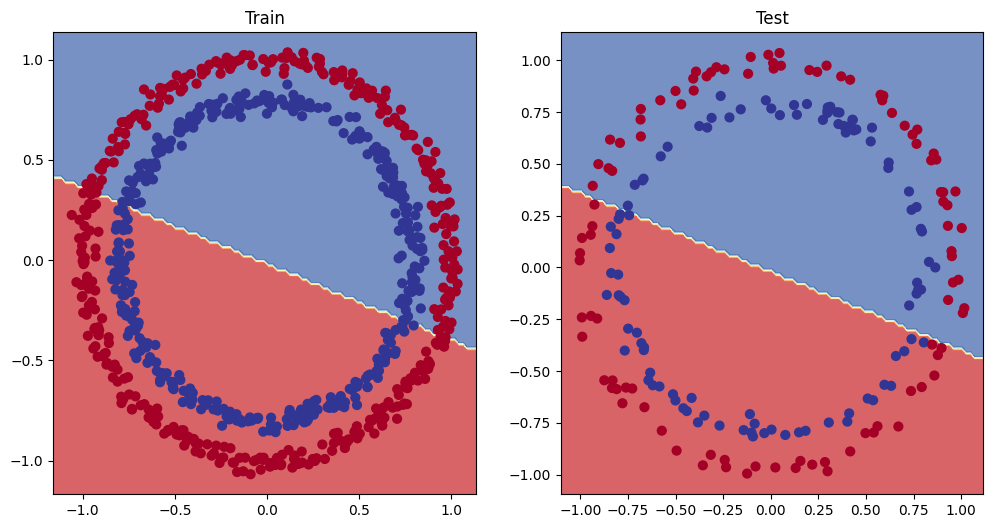

In [46]:
plt.figure(figsize=(12, 6))

# plot for training set
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)

# Plot for testing set
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

In [47]:
# Create some data (same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # linear regression formula

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [48]:
# Create train and test splits
train_split = int(0.8 * len(X_regression)) # 80% of data used for training set
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the lengths of each split
print(len(X_train_regression), 
    len(y_train_regression), 
    len(X_test_regression), 
    len(y_test_regression))

80 80 20 20


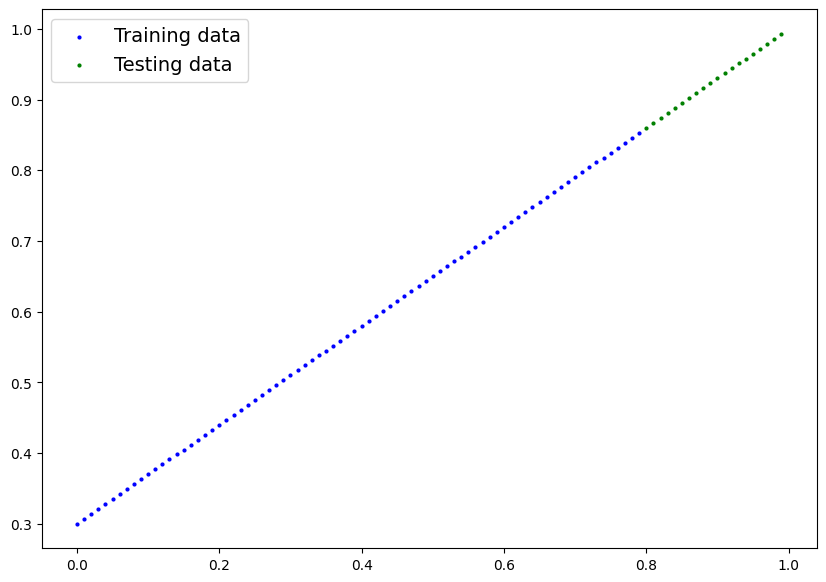

In [49]:
plot_predictions(train_data=X_train_regression,
    train_labels=y_train_regression,
    test_data=X_test_regression,
    test_labels=y_test_regression
);

In [50]:
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1),
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [51]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(model_2.parameters(), lr=0.1)

In [53]:
torch.manual_seed(42)

epochs = 1000

X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
    ## Training mode
    model_2.train()

    # 1.Forward pass
    y_pred = model_2(X_train_regression)

    # 2. Calculating loss
    loss = loss_fn(y_pred, y_train_regression)

    # 3.Optimizer zero grad
    optimizer.zero_grad()


    # 4. Loss backward
    loss.backward()

    # 5. optimizer step
    optimizer.step()


    model_2.eval()

    with torch.inference_mode():
        test_pred = model_2(X_test_regression)

        test_loss = loss_fn(test_pred, y_test_regression)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

Epoch: 0 | Train loss: 0.75986, Test loss: 0.54143
Epoch: 10 | Train loss: 0.14550, Test loss: 0.02363
Epoch: 20 | Train loss: 0.14420, Test loss: 0.05597
Epoch: 30 | Train loss: 0.10136, Test loss: 0.03785
Epoch: 40 | Train loss: 0.07525, Test loss: 0.00984
Epoch: 50 | Train loss: 0.07625, Test loss: 0.02102
Epoch: 60 | Train loss: 0.10320, Test loss: 0.02754
Epoch: 70 | Train loss: 0.08643, Test loss: 0.01007
Epoch: 80 | Train loss: 0.06937, Test loss: 0.01326
Epoch: 90 | Train loss: 0.08678, Test loss: 0.03027
Epoch: 100 | Train loss: 0.09309, Test loss: 0.02901
Epoch: 110 | Train loss: 0.06735, Test loss: 0.00973
Epoch: 120 | Train loss: 0.08538, Test loss: 0.03464
Epoch: 130 | Train loss: 0.07850, Test loss: 0.02388
Epoch: 140 | Train loss: 0.09153, Test loss: 0.02218
Epoch: 150 | Train loss: 0.07135, Test loss: 0.02059
Epoch: 160 | Train loss: 0.06966, Test loss: 0.01357
Epoch: 170 | Train loss: 0.07144, Test loss: 0.01682
Epoch: 180 | Train loss: 0.06925, Test loss: 0.01691
Epoc

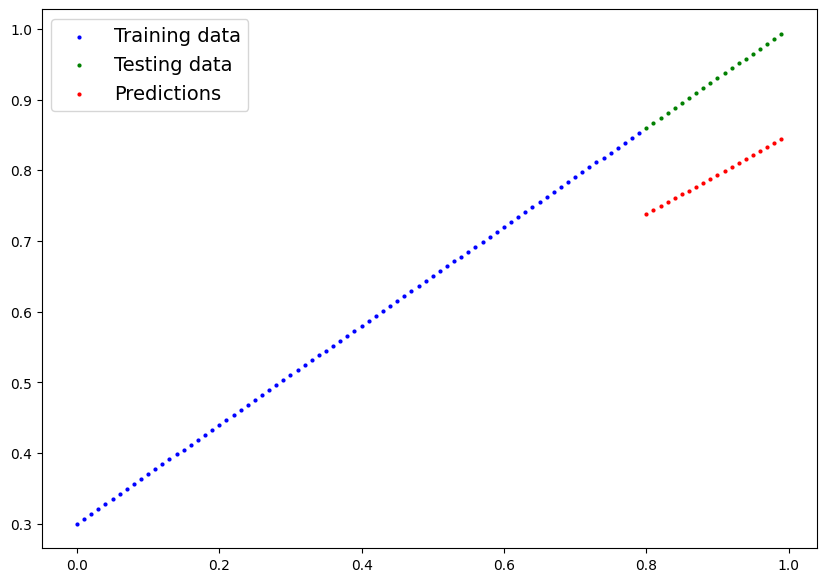

In [56]:
# Turn on evaluation mode
model_2.eval()

# Make predictions (inference)
with torch.inference_mode():
    y_preds = model_2(X_test_regression)

# Plot data and predictions with data on the CPU (matplotlib can't handle data on the GPU)
# (try removing .cpu() from one of the below and see what happens)
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu());

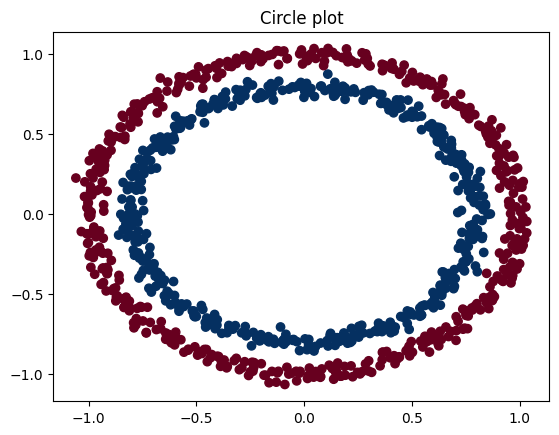

In [58]:
n_samples = 1000 

X, y = make_circles(n_samples=n_samples, 
                    noise=0.03, 
                    random_state=42)

plt.title("Circle plot")
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu)

In [59]:
# turning data to tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [64]:
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # Input embeding layer
        x = self.layer_1(x)

        # 1st Relu Activation layer
        x = self.relu(x)

        # 1st hidden layer
        x = self.layer_2(x)

        # 2nd activation layer
        x = self.relu(x)

        # 2nd hidden layer (output layer)
        x = self.layer_3(x)

        return x     

In [65]:
model_3 = CircleModelV2().to(device)

model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [66]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(), lr=0.1)

In [67]:
torch.manual_seed(42)

epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    # Training mode
    model_3.train()

    # 1.Forward pass 
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    # 2. Calculating loss and accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. optimizer step
    optimizer.step()


    model_3.eval()

    with torch.inference_mode():
        test_logits = model_3(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits, y_test)
        loss_acc = accuracy_fn(y_pred=test_pred, y_true=y_test)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69295, Accuracy: 50.00% | Test Loss: 0.69319, Test Accuracy: 52.50%
Epoch: 100 | Loss: 0.69115, Accuracy: 52.88% | Test Loss: 0.69102, Test Accuracy: 52.50%
Epoch: 200 | Loss: 0.68977, Accuracy: 53.37% | Test Loss: 0.68940, Test Accuracy: 52.50%
Epoch: 300 | Loss: 0.68795, Accuracy: 53.00% | Test Loss: 0.68723, Test Accuracy: 52.50%
Epoch: 400 | Loss: 0.68517, Accuracy: 52.75% | Test Loss: 0.68411, Test Accuracy: 52.50%
Epoch: 500 | Loss: 0.68102, Accuracy: 52.75% | Test Loss: 0.67941, Test Accuracy: 52.50%
Epoch: 600 | Loss: 0.67515, Accuracy: 54.50% | Test Loss: 0.67285, Test Accuracy: 52.50%
Epoch: 700 | Loss: 0.66659, Accuracy: 58.38% | Test Loss: 0.66322, Test Accuracy: 52.50%
Epoch: 800 | Loss: 0.65160, Accuracy: 64.00% | Test Loss: 0.64757, Test Accuracy: 52.50%
Epoch: 900 | Loss: 0.62362, Accuracy: 74.00% | Test Loss: 0.62145, Test Accuracy: 52.50%


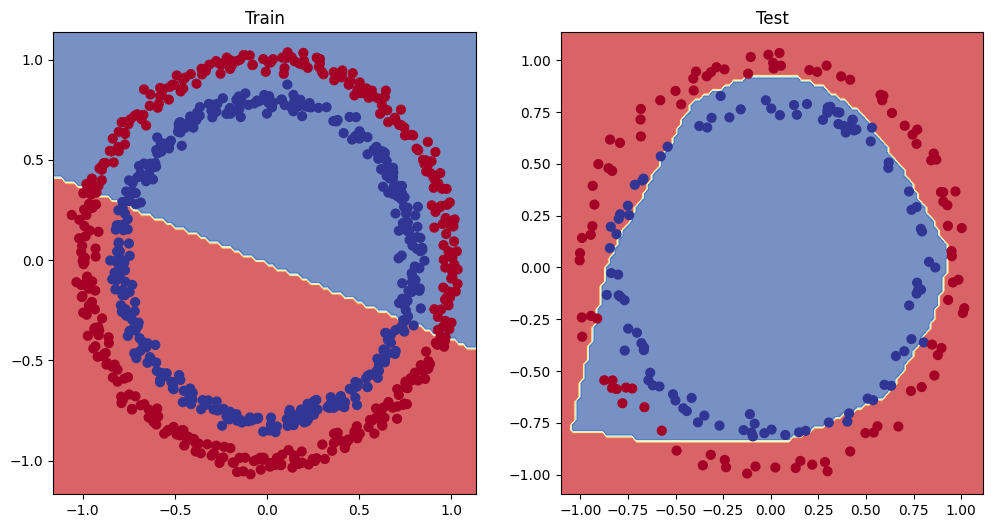

In [69]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train) # model_1 = no non-linearity

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test) # model_3 = has non-linearity

In [70]:
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

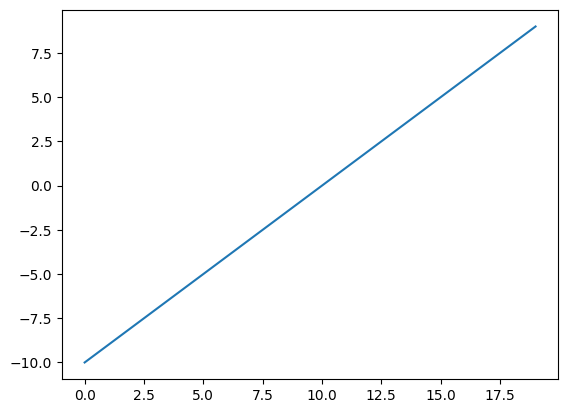

In [71]:
plt.plot(A)

In [75]:
# relu(A)

# 🔹 ReLU (Rectified Linear Unit) Activation Function

### **Equation**

$$
f(x) = \max(0, x)
$$

### **Explanation**

* ReLU outputs **0** when the input is less than 0, and outputs the input itself when the input is greater than or equal to 0.
* This makes the function very simple and efficient to compute.
* ReLU introduces **non-linearity** into the model, which allows neural networks to learn more complex patterns.

### **Use**

* Commonly used in **hidden layers** of deep neural networks.
* Helps networks train faster and reduces issues like the **vanishing gradient problem** that appear with other activations.

In [72]:
def relu(x: torch.Tensor) -> torch.Tensor:
    return torch.maximum(torch.tensor(0), x)

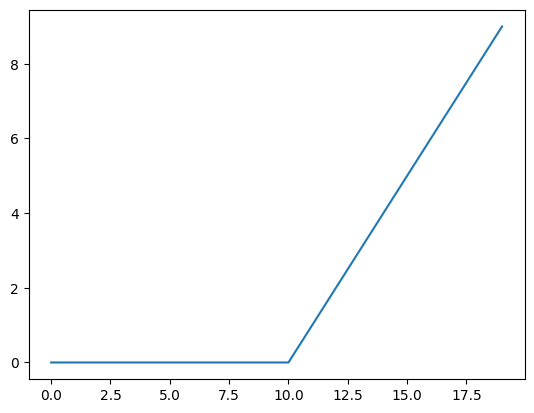

In [74]:
plt.plot(relu(A))

# 🔹 Sigmoid Activation Function

### **Equation**

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

### **Explanation**

* The sigmoid function squashes any real-valued number into a range between **0 and 1**.
* For very large positive values of $x$, the output approaches **1**.
* For very large negative values of $x$, the output approaches **0**.
* Around $x = 0$, the sigmoid is steep and sensitive, meaning small changes in input cause noticeable changes in output.

### **Use**

* Often used when we want the output to represent a **probability**, such as in **binary classification problems**.
* Its smooth, S-shaped curve makes it intuitive for modeling probabilities.

In [76]:
def sigmoid(x: torch.Tensor) -> torch.Tensor:
    return 1 / (1 + torch.exp(-x))

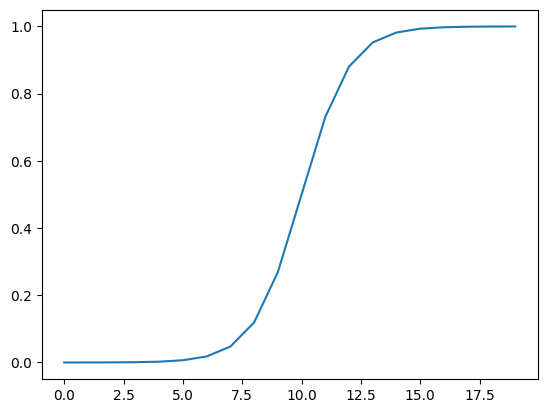

In [77]:
plt.plot(sigmoid(A))

# 8. Putting Things Together: Building a Multi-Class PyTorch Model

So far, we’ve covered the foundations of classification problems in PyTorch. Now, let’s bring everything together by working through a **multi-class classification example**.

### 🔹 Binary vs Multi-Class Classification

* **Binary classification** → Classifying inputs into one of two categories.
  *Example:* Determining if a photo is of a **dog** or a **cat**.
* **Multi-class classification** → Classifying inputs into one of *more than two categories*.
  *Example:* Determining if a photo is of a **dog**, a **cat**, or a **chicken**.

👉 In fact, popular datasets like **ImageNet-1k** are multi-class datasets, containing **1000 different categories** to classify from.

---

## 8.1 Creating Multi-Class Classification Data

To practice, let’s first create some **synthetic multi-class data**. We’ll use **Scikit-Learn’s `make_blobs()`** function:

### Steps:

1. **Generate multi-class data** using `make_blobs()`.

   * The `centers` parameter controls how many classes we create.
2. **Convert the data into tensors**, since PyTorch works with tensors rather than NumPy arrays.
3. **Split the data** into training and test sets using `train_test_split()`.
4. **Visualize the data** to understand what we’re working with.

---

✅ This setup will give us a clean, simple dataset for experimenting with a **PyTorch model** that can classify points into multiple classes.

In [81]:
from sklearn.datasets import make_blobs

NUM_CLASES = 4
NUM_FEAUTURES = 2
RANDOM_STATE = 42

X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEAUTURES,
                            centers=NUM_CLASES,
                            random_state=RANDOM_STATE,
                            cluster_std=1.5
                           )

X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(f"X_blob: {X_blob[:5]} \n \ny_blob: {y_blob[:5]}")



X_blob: tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) 
 
y_blob: tensor([3, 2, 2, 1, 1])


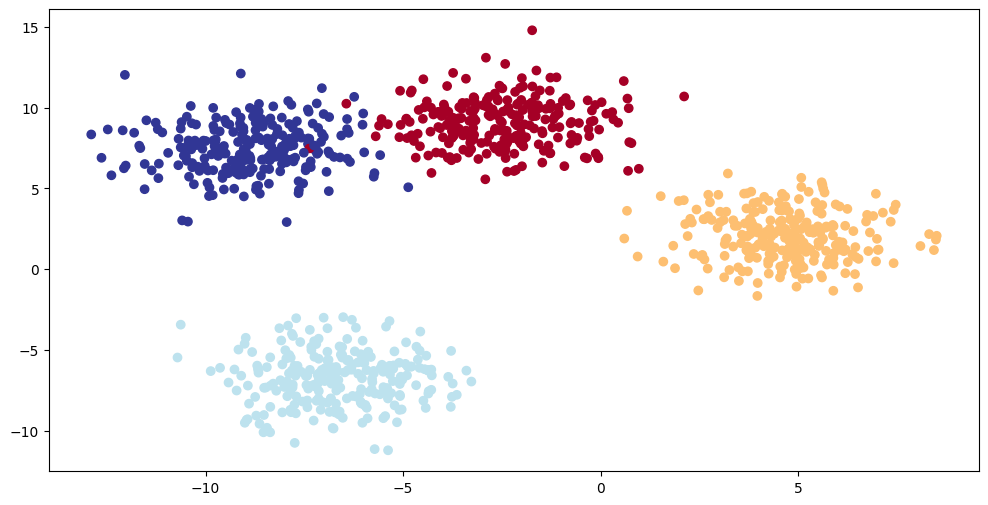

In [82]:
plt.figure(figsize=(12, 6))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

In [92]:
class BlobModel(nn.Module):
    def __init__(self, input_features: int, output_features: int, hidden_units: int = 8) -> None:
        """Initializes all required hyperparameters for a multi-class classification model.

        Args:
            input_features (int): Number of input features to the model.
            out_features (int): Number of output features of the model
              (how many classes there are).
            hidden_units (int): Number of hidden units between layers, default 8.
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(), 
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(), 
            nn.Linear(in_features=hidden_units, out_features=output_features), 
        )
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer_stack(x)
        

In [95]:
model_4 = BlobModel(input_features=NUM_FEAUTURES, 
                    output_features=NUM_CLASES, 
                    hidden_units=8).to(device)

model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [96]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_4.parameters(), lr=0.1)

In [99]:
model_4(X_blob.to(device))[0].shape, NUM_CLASES

(torch.Size([4]), 4)

In [101]:
y_logits = model_4(X_blob.to(device))

y_pred_probs = torch.softmax(y_logits, dim=1) 
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-1.1155e-02,  2.5968e-01, -5.8290e-01, -3.0780e-01],
        [ 8.7684e-01,  1.9668e-01, -5.1636e-01, -4.5955e-01],
        [ 9.2357e-01,  2.0918e-01, -5.2986e-01, -4.6903e-01],
        [ 8.9364e-02,  1.1543e-04, -2.7221e-01, -4.3854e-01],
        [ 9.0877e-02,  9.7211e-03, -2.7984e-01, -3.8989e-01]], device='mps:0',
       grad_fn=<SliceBackward0>)
tensor([[0.2763, 0.3623, 0.1560, 0.2054],
        [0.4956, 0.2511, 0.1231, 0.1302],
        [0.5072, 0.2483, 0.1186, 0.1260],
        [0.3124, 0.2857, 0.2176, 0.1843],
        [0.3095, 0.2854, 0.2137, 0.1914]], device='mps:0',
       grad_fn=<SliceBackward0>)


In [104]:
# making train and test data
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size=0.2, random_state=42)

In [109]:
torch.manual_seed(42)

epochs = 100

# Moving the data to GPU
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
    # Training mode
    model_4.train()

    # 1. Forward
    y_logits = model_4(X_blob_train)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_blob_train)
    acc =  accuracy_fn(y_true=y_blob_train, y_pred=y_pred)

    # 3. Zero grad
    optimizer.zero_grad()

    # 4. loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    model_4.eval()
    with torch.inference_mode():
        test_logits = model_4(X_blob_test)
        test_pred = torch.softmax(test_logits,dim=1).argmax(dim=1)

        test_loss = loss_fn(test_logits, y_blob_test)
        test_acc = accuracy_fn(y_true=y_blob_test, y_pred=test_pred)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

    

Epoch: 0 | Loss: 1.40263, Acc: 13.00% | Test Loss: 1.29221, Test Acc: 26.00%
Epoch: 10 | Loss: 0.70213, Acc: 79.62% | Test Loss: 0.61980, Test Acc: 87.50%
Epoch: 20 | Loss: 0.41099, Acc: 96.62% | Test Loss: 0.34919, Test Acc: 98.50%
Epoch: 30 | Loss: 0.23174, Acc: 99.12% | Test Loss: 0.19357, Test Acc: 99.50%
Epoch: 40 | Loss: 0.13575, Acc: 99.25% | Test Loss: 0.11279, Test Acc: 99.50%
Epoch: 50 | Loss: 0.09188, Acc: 99.25% | Test Loss: 0.07523, Test Acc: 99.50%
Epoch: 60 | Loss: 0.07029, Acc: 99.25% | Test Loss: 0.05630, Test Acc: 99.50%
Epoch: 70 | Loss: 0.05820, Acc: 99.25% | Test Loss: 0.04556, Test Acc: 99.50%
Epoch: 80 | Loss: 0.05069, Acc: 99.25% | Test Loss: 0.03884, Test Acc: 99.50%
Epoch: 90 | Loss: 0.04565, Acc: 99.12% | Test Loss: 0.03430, Test Acc: 99.50%


In [111]:
# Make predictions
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)
    y_preds = torch.softmax(y_logits, dim=1).argmax(dim=1)

# View the first 10 predictions
# y_preds[:10]
print(f"Predictions: {y_preds[:10]}\nLabels: {y_blob_test[:10]}")
print(f"Test accuracy: {accuracy_fn(y_true=y_blob_test, y_pred=y_preds)}%")

Predictions: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='mps:0')
Labels: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='mps:0')
Test accuracy: 99.5%


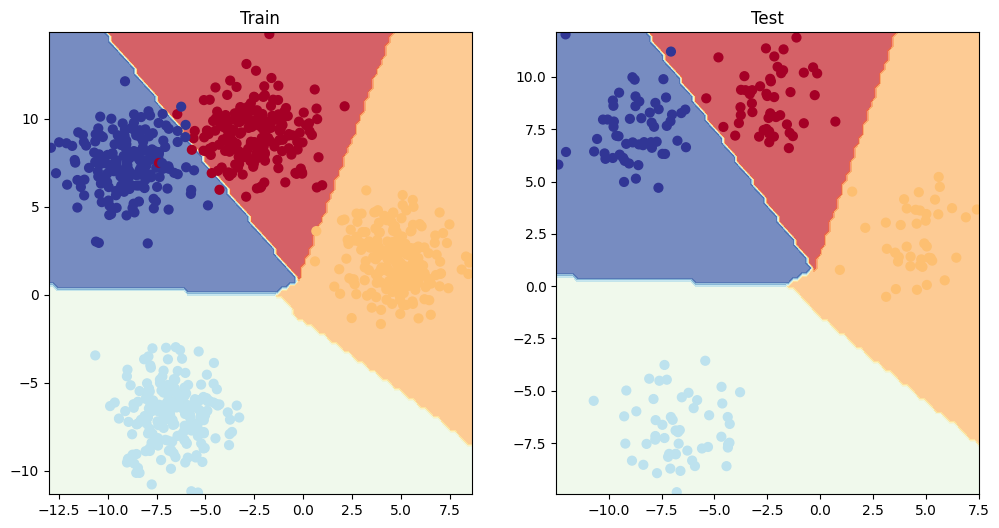

In [112]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model=model_4, X=X_blob_train, y=y_blob_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model=model_4, X=X_blob_test, y=y_blob_test)

In [113]:
 from torchmetrics import Accuracy

In [114]:
torchmetrics_accuracy = Accuracy(task='multiclass', num_classes=4).to(device)

# Calculate accuracy
torchmetrics_accuracy(y_preds, y_blob_test)

tensor(0.9950, device='mps:0')